In [93]:
# todo: generate plots to visualize my location data

from numpy import *
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gp
import contextily as cx
import os
import json

# Location History dir copied from my Google Takeout download
locdir = os.path.join('.','Location History')
# os.chdir(os.path.join(os.getcwd(),'Location History'))

## map plot test

In [34]:
f = open(os.path.join('GeoData','Madison','citylimit.json'))
citydata = json.load(f)
f.close()

In [38]:
madshp = gp.read_file(os.path.join('GeoData','Madison','city_limit.shp'))

<AxesSubplot:>

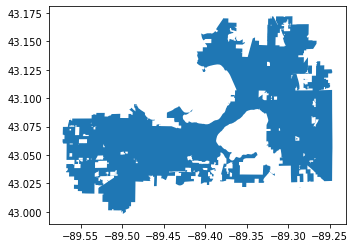

In [39]:
madshp.plot()

## location testing

In [40]:
# load location data
f = open(os.path.join(locdir,'Records.json'))
locdata = json.load(f)
f.close()

city = gp.read_file(os.path.join('GeoData','Madison','city_limit.shp'))

In [41]:
locdata.keys()

dict_keys(['locations'])

In [42]:
# convert dictionary into usable 
preview = locdata['locations'][:5]
preview

[{'latitudeE7': 452865402,
  'longitudeE7': -937866040,
  'accuracy': 30,
  'activity': [{'activity': [{'type': 'TILTING', 'confidence': 100}],
    'timestamp': '2014-08-12T01:34:49.431Z'},
   {'activity': [{'type': 'STILL', 'confidence': 51},
     {'type': 'UNKNOWN', 'confidence': 40},
     {'type': 'IN_VEHICLE', 'confidence': 6},
     {'type': 'ON_FOOT', 'confidence': 3},
     {'type': 'UNKNOWN', 'confidence': 3}],
    'timestamp': '2014-08-12T03:11:42.431Z'}],
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:12:09.496Z'},
 {'latitudeE7': 452865609,
  'longitudeE7': -937866826,
  'accuracy': 30,
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:13:09.525Z'},
 {'latitudeE7': 452866329,
  'longitudeE7': -937866826,
  'accuracy': 30,
  'source': 'WIFI',
  'deviceTag': 2132162846,
  'timestamp': '2014-08-12T03:14:10.039Z'},
 {'latitudeE7': 452865609,
  'longitudeE7': -937866443,
  'accuracy': 30,
  'activity': [{'activity': [{'type':

In [29]:
array([[x['latitudeE7']*1e-7,x['longitudeE7']*1e-7] for x in preview])

array([[ 45.2865402, -93.786604 ],
       [ 45.2865609, -93.7866826],
       [ 45.2866329, -93.7866826],
       [ 45.2865609, -93.7866443],
       [ 45.2865673, -93.7867319]])

In [43]:
coords = array([[x['latitudeE7']*1e-7,x['longitudeE7']*1e-7] for x in locdata['locations']])
lat,lon = coords.transpose()

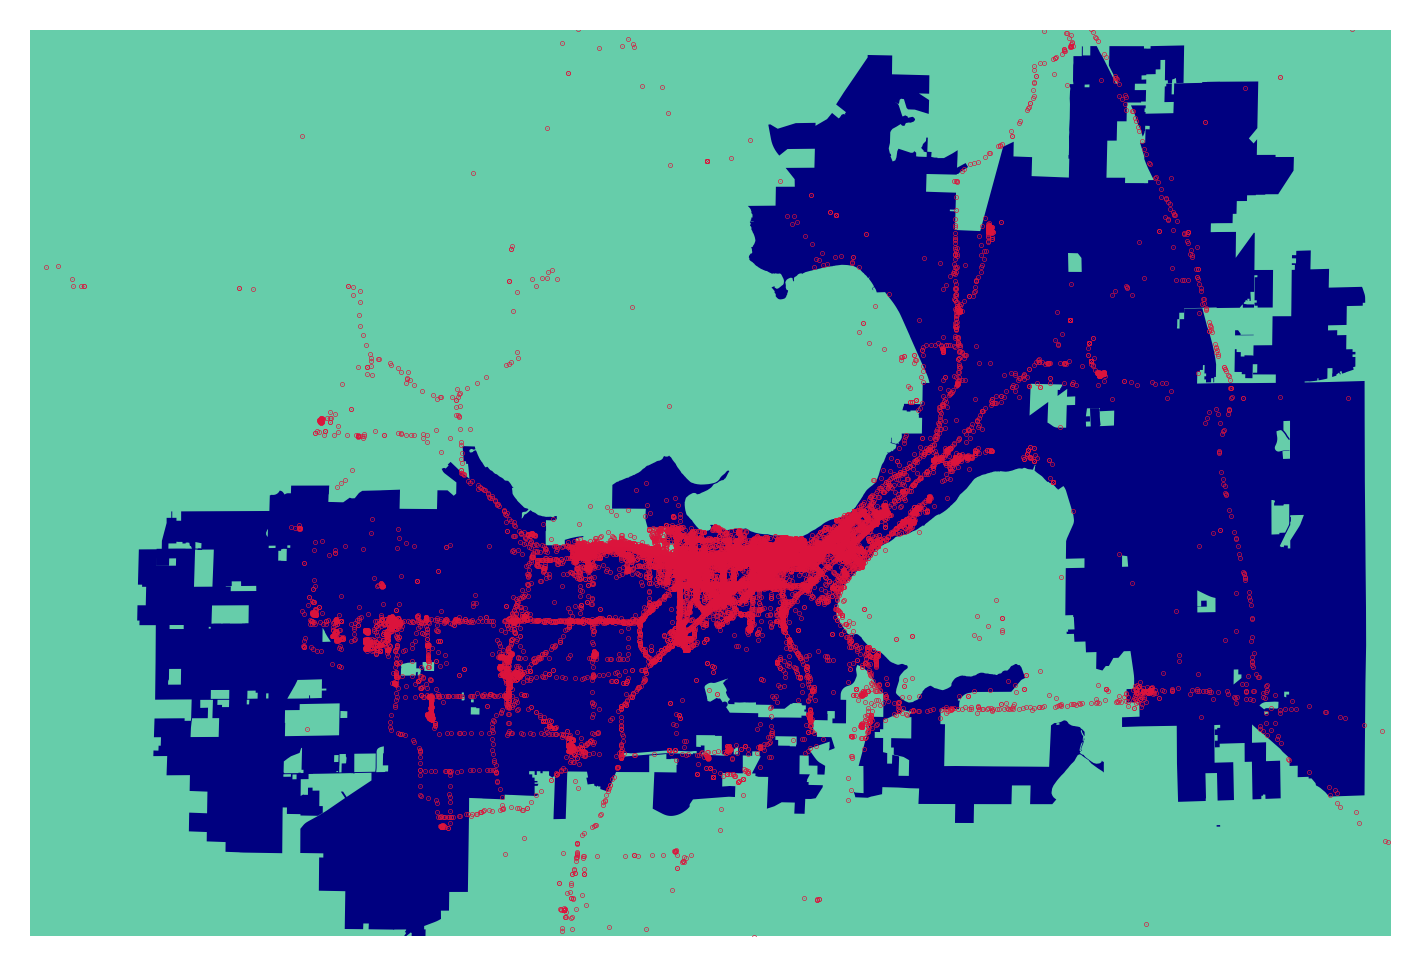

<Figure size 432x288 with 0 Axes>

In [91]:
fig, ax = plt.subplots(dpi=300)
city.plot(ax=ax,color='navy')
ax.scatter(lon,lat,s=.1,marker='.',color='crimson')
ax.set_facecolor('mediumaquamarine')
ax.set_xlim((-89.6,-89.24))
ax.set_ylim((43,43.175))
# ax.set_axis_off()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_xaxis().set_ticks([])
ax.get_yaxis().set_ticks([])
plt.show()
# plt.savefig('madison_city_limits_loc_data_20220310_v1.png')

In [46]:
def hist2d(data,nx,ny=None):
    """
    return a 2d array of counts
    
    args:
        data: 2d data assumed to be numerical. will be chunked into bins.
        nx: equal to the number of evenly spaced "vertical" slices to be made plus one when cutting up the data space
        ny: like binsx but "horizontal" slices.
    returns:
        counts: 2d array of shape (nx,ny) containing the number of occurences of data in each bin
    """
    if binsy=None:
        binsy=binsx
    
    # probably efficient an innefficient approaches to this. start with a more intuitive approach.
    xd,yd = data
    
    # first bin all the data in x bins
    # 1. sort both lists by the x list
    # 2. bins pairs in x by the x values
    # 3. for each x bin, sort the data by y value
    # 4. for each x bin, bin the pairs by y values
    
    dtype = [('x',float),('y',float)]
    pairs = array([(x,y) for x,y in zip(xd,yd)],dtype=dtype)
    xsort = sort(pairs,order='x')
    xmin  = xsort[0][0]
    xmax = xsort[-1][0]
    n = 5 # xbins
    xbins = array([[p for p in xsort 
                    if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] 
                    for i in range(nx)],dtype='object')
    for xb in xbins:
        

In [230]:
# test binning procedure

# number of bins
dtype = [('x',float),('y',float)]
samps = 100
test = array([(random.rand(),random.rand()) for i in range(samps)],dtype=dtype)
xsort = sort(test,order='x')
xmin = xsort[0][0]
xmax = xsort[-1][0]
ysort = sort(test,order='y')
ymin = ysort[0][1]
ymax = ysort[-1][1]
nx = 5 # xbins
xbins = array([[p for p in xsort if xmin+(xmax-xmin)*(i/nx)<=p[0]<=xmax-(xmax-xmin)*((nx-i-1)/nx)] for i in range(nx)],dtype='object')
ny = 3
counts = empty((nx,ny))
for xi,xb in enumerate(xbins):
    ysort = sort(array(xb,dtype=dtype),order='y')
    ybins = array([[p for p in ysort if 
                    ymin+(ymax-ymin)*(i/ny)<=p[1]<=ymax-(ymax-ymin)*((ny-i-1)/ny)] 
                    for i in range(ny)],dtype='object')
    counts[xi,:] = [len(yb) for yb in flip(ybins)]

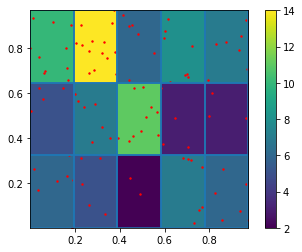

In [231]:
x = array([t[0] for t in test])
y = array([t[1] for t in test])
plt.scatter(x,y,color='red',s=2)
for i in range(nx):
    plt.axvline(xmin+(xmax-xmin)*(i/nx))
    plt.axvline(xmax-(xmax-xmin)*((nx-i-1)/nx))
for i in range(ny):
    plt.axhline(ymin+(ymax-ymin)*(i/ny))
    plt.axhline(ymax-(ymax-ymin)*((ny-i-1)/ny))

cax = plt.imshow(counts.transpose(),extent=[xmin,xmax,ymin,ymax])
plt.colorbar(cax)
plt.xlim((xmin,xmax))
plt.ylim((ymin,ymax))
fig.dpi=200